<a href="https://colab.research.google.com/github/DataAnalysis-python/soccer-FIFA/blob/sunmi/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
#FIFA 선수 이적료 예측 경진대회


In [64]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
fc-cache: invalid option -- ']'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose            display status information while busy
  -V, --version            display font config version and exit
  -h, --help               di

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [67]:
train= pd.read_csv('/content/drive/MyDrive/데이콘/FIFA_train.csv')

In [68]:
train=train[:200]

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                200 non-null    int64  
 1   name              200 non-null    object 
 2   age               200 non-null    int64  
 3   continent         200 non-null    object 
 4   contract_until    200 non-null    object 
 5   position          200 non-null    object 
 6   prefer_foot       200 non-null    object 
 7   reputation        200 non-null    float64
 8   stat_overall      200 non-null    int64  
 9   stat_potential    200 non-null    int64  
 10  stat_skill_moves  200 non-null    float64
 11  value             200 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 18.9+ KB


In [70]:
# 내림차순으로 정렬
train.sort_values(by="value",ascending=False)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
17,30,Isco,26,europe,2022,ST,right,3.0,88,91,4.0,73500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
18,32,Coutinho,26,south america,2023,ST,right,3.0,88,89,5.0,69500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,316,Aduriz,37,europe,2019,ST,right,3.0,82,82,3.0,8000000.0
138,224,Pepe Reina,35,europe,2021,GK,right,3.0,83,83,1.0,6000000.0
194,314,Dani Alves,35,south america,2019,DF,right,4.0,82,82,4.0,4800000.0
23,41,G. Buffon,40,europe,2019,GK,right,4.0,88,88,1.0,4000000.0


In [71]:
# 계약기간을 2019~2024년으로 한정
train["contract_until"].unique()

year=['2021', '2020', '2019', '2023', '2022', '2024']

#지정한 계약기간이 아닌 
train[~train["contract_until"].isin(year)]

#행 5개의 행을 제외
train=train[train["contract_until"].isin(year)]

train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,316,Aduriz,37,europe,2019,ST,right,3.0,82,82,3.0,8000000.0
196,317,P. Čech,36,europe,2019,GK,left,4.0,82,82,1.0,3000000.0
197,324,Nélson Semedo,24,europe,2022,DF,right,2.0,81,86,4.0,20000000.0
198,325,Pablo Fornals,22,europe,2022,MF,right,1.0,81,86,4.0,24000000.0


In [88]:
# 결측치 확인
train.isna().sum().sum()

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   contract_until  195 non-null    object 
 1   position        195 non-null    object 
 2   reputation      195 non-null    float64
 3   stat_overall    195 non-null    int64  
 4   stat_potential  195 non-null    int64  
 5   age             195 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 10.7+ KB


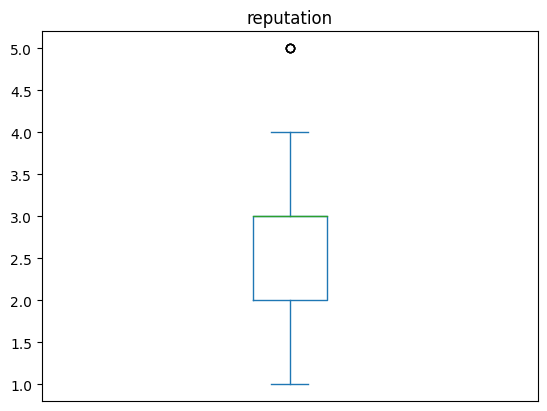

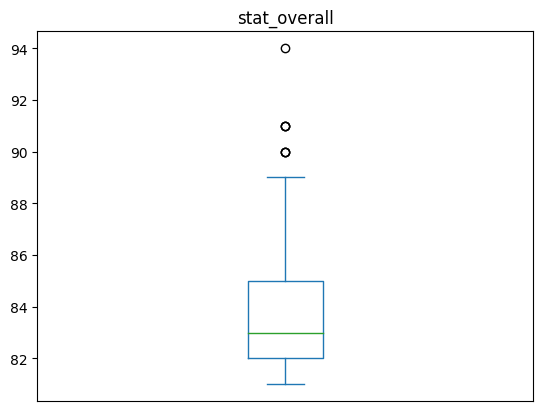

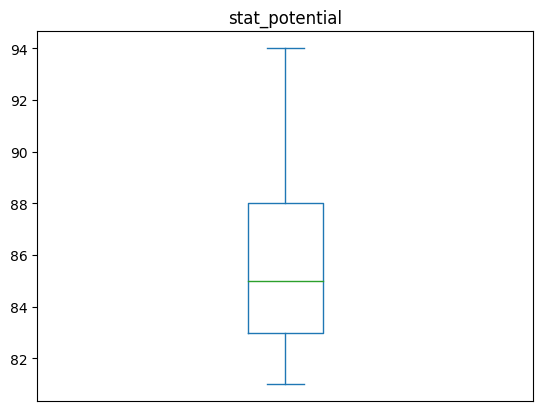

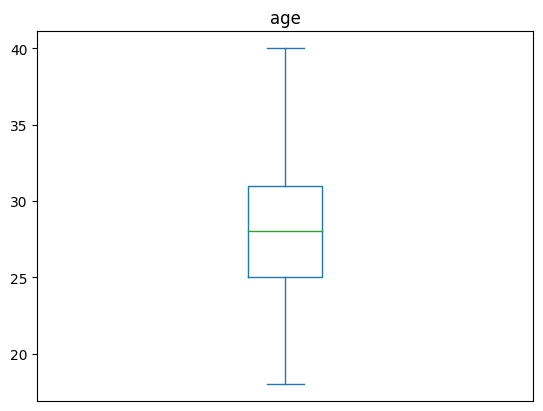

In [117]:
#이상치 확인
cols = ["contract_until", "position","reputation","stat_overall","stat_potential","age"]

train[cols].info()

ncols=["reputation","stat_overall","stat_potential","age"]

for i in range(len(ncols)):
  train.loc[:,ncols[i]].plot.box()
  plt.xticks([])
  plt.title(ncols[i])
  plt.show()

# 그래프 보여주기


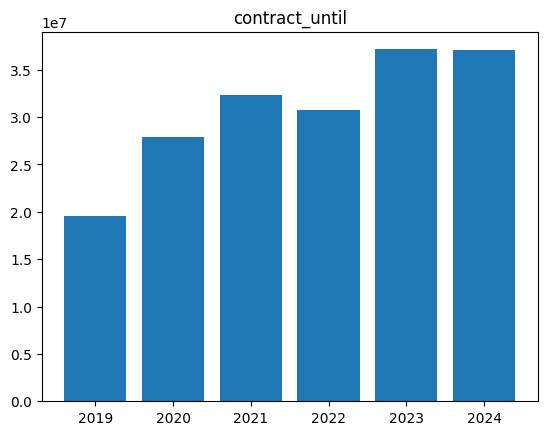

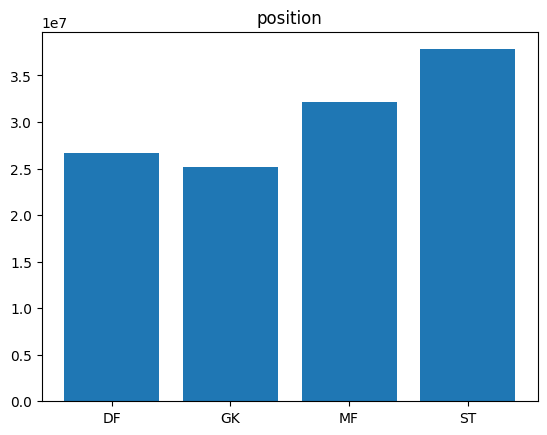

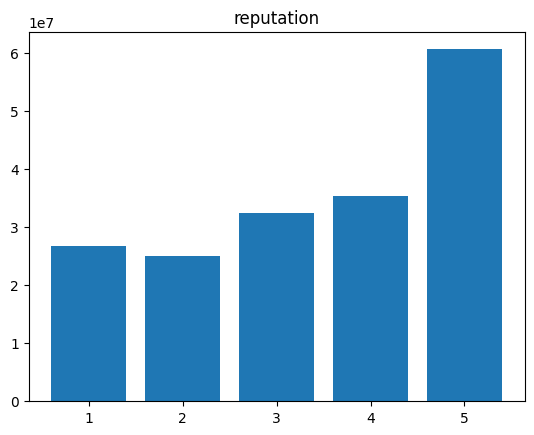

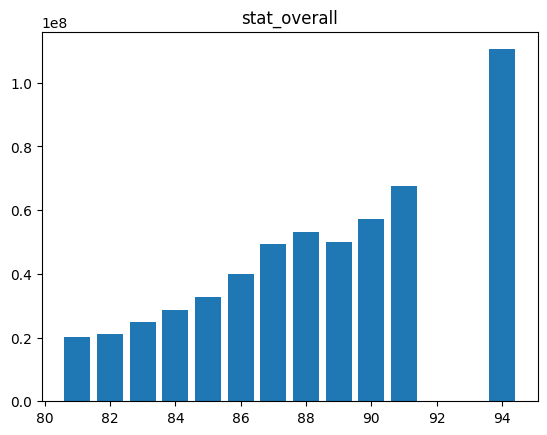

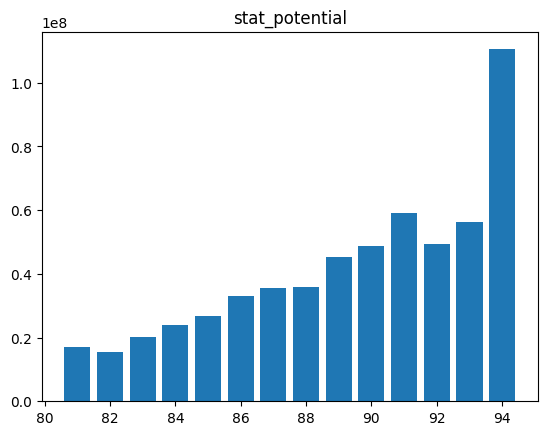

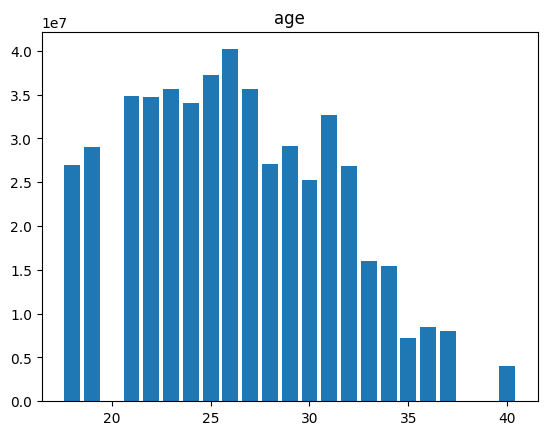

In [86]:
cols = ["contract_until", "position","reputation","stat_overall","stat_potential","age"]
result = [train.groupby(col)['value'].mean() for col in cols]

for i in range(len(cols)):
    r = result[i]
    col_name = cols[i]
    
    x = r.index
    y = r.values

    plt.bar(x, y)
    plt.title(col_name)
    plt.show()

각 조건들과 이적료간의 관계를 분석했을 때의 결과 
https://dacon.io/competitions/official/235538/codeshare/5765?page=1&dtype=recent&ptype&fType

한계 - mean만으로 이적료간의 관계를 분석하는 방법으론 다소 부족